In [1]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [5]:
def detectarPlacas (strImage):
    placa = []
    image = cv2.imread(strImage)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.blur(gray,(3,3))
    canny = cv2.Canny(gray,150,200)
    canny = cv2.dilate(canny, None , iterations=1)
    # _ , cnts , _ = cv2.findContours(canny , cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE) #opcenCV 3
    cnts , _ = cv2.findContours(canny , cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE) #opcenCV4

    for c in cnts:
        text =''
        area = cv2.contourArea(c)
        #if area > 8000: print(area)
        x,y,w,h = cv2.boundingRect(c)
        epsilon = 0.09 * cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c, epsilon, True)
        if len(approx) == 4 and area > 450:
            print('area: ', area)
            print("W: ", w)
            print("H: ", h)
            aspec_ratio = float(w)/h
            print('Relacion de aspecto: ',aspec_ratio)
            
            cv2.drawContours(image, [approx],0, (0,255,0),3)
            if aspec_ratio > 3:
                placa = gray[y:y+h, x:x+w]
                text = pytesseract.image_to_string(placa,config = '--psm 11').strip()
                print("Placa: ", text)
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
                cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)
                plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
   
   

In [6]:
listaAutos = ['auto.jpg','auto2.jpg','big_with_watermark_91.2.jpg']

area:  1194.0
W:  52
H:  30
Relacion de aspecto:  1.7333333333333334
area:  8126.0
W:  167
H:  50
Relacion de aspecto:  3.34
Placa:  CVL 657 18
area:  9007.0
W:  171
H:  54
Relacion de aspecto:  3.1666666666666665
Placa:  CVL 657 18


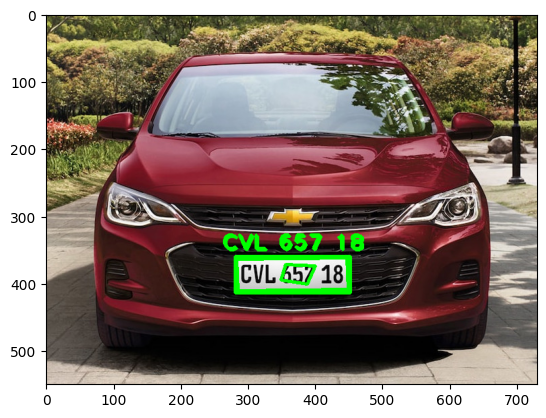

In [7]:
for i in range(3):
    detectarPlacas(listaAutos[i])
  